In [1329]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid', font_scale=1.5)
sns.set_palette('Set2', n_colors=10)
plt.rc('font', family='malgun gothic')
plt.rc('axes', unicode_minus=False)

In [1330]:
df = pd.read_excel('data.xlsx')

In [1331]:
df.head()

,번호,코드,매장명,Unnamed: 3,Location,Unnamed: 5,Use of Store Space,Unnamed: 7,Unnamed: 8,Use of Store Capacity,...,Unnamed: 24,Unnamed: 25,2009,Unnamed: 27,Unnamed: 28,2005,2006,2007,2008,2009
0,NaN,NaN,국문,영문,Region,City,Type,Floor,Size (㎡),No. Table,...,Guest,PPA,Total Sales,Guest,PPA,EBITDA,EBITDA,EBITDA,EBITDA,EBITDA
1,1.0,KO01,공항점,Airport,Seoul,Seoul,F.S,F2 + F3,950.4,58,...,205344,16582.053617,3660158827,206825,17696.887838,1016880802.00966,880804927.054007,703117126,706343937,740945950
2,2.0,KO02,강남점,Kangnam,Seoul,Seoul,F.S,F2 + F3,749.1,50,...,151311,17643.321523,2813496353,148944,18889.625316,672327633.704433,602990750.971832,523887352,536009123,548717030
3,3.0,KO03,홍대점,Hongdae,Seoul,Seoul,I.L,F1,519,56,...,184152,16447.355093,2214037332,127192,17407.048651,871453843.039647,669037511.946845,602495775,553183789,386276076
4,4.0,KO04,청담점,Chongdam,Seoul,Seoul,I.L,B1 + F1,505.23,49,...,144342,17314.049833,2416215554,127987,18878.601374,678943589.950828,586514290.518237,283125442,213743933,262690152


In [1332]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   번호                     104 non-null    float64
 1   코드                     104 non-null    object 
 2   매장명                    105 non-null    object 
 3   Unnamed: 3             105 non-null    object 
 4   Location               105 non-null    object 
 5   Unnamed: 5             105 non-null    object 
 6   Use of Store Space     105 non-null    object 
 7   Unnamed: 7             105 non-null    object 
 8   Unnamed: 8             105 non-null    object 
 9   Use of Store Capacity  105 non-null    object 
 10  Unnamed: 10            105 non-null    object 
 11  Opening / Expiry Date  105 non-null    object 
 12  Operating              105 non-null    object 
 13  Unnamed: 13            105 non-null    object 
 14  2005                   69 non-null     object 
 15  Unname

# Cleaning Dataset

### Column rename

In [1333]:
new_columns = df.iloc[0].values
new_columns[0] = '번호'
new_columns[1] = '코드'
new_columns = [i.replace(' ', '') for i in list(new_columns)]

In [1334]:
year_columns_list = []
year = 2004
count = 0
for i in new_columns[14:-5]:
    if count % 3 == 0:
        year += 1
    new_value = str(year) + '_' + i
    year_columns_list.append(new_value)
    count += 1
print(year_columns_list)
new_columns[14:-5] = year_columns_list

['2005_TotalSales', '2005_Guest', '2005_PPA', '2006_TotalSales', '2006_Guest', '2006_PPA', '2007_TotalSales', '2007_Guest', '2007_PPA', '2008_TotalSales', '2008_Guest', '2008_PPA', '2009_TotalSales', '2009_Guest', '2009_PPA']


In [1335]:
new_ebitda_list = []
for i in zip(new_columns[-5:], [i for i in range(2005,2010)]):
    new_value = str(i[0]) + '_' + str(i[1])
    new_ebitda_list.append(new_value)

new_columns[-5:] = new_ebitda_list
print(new_columns, end=' ')

['번호', '코드', '국문', '영문', 'Region', 'City', 'Type', 'Floor', 'Size(㎡)', 'No.Table', 'No.Seat', 'OpeningDate', 'OperatingHours', 'No.Staffs', '2005_TotalSales', '2005_Guest', '2005_PPA', '2006_TotalSales', '2006_Guest', '2006_PPA', '2007_TotalSales', '2007_Guest', '2007_PPA', '2008_TotalSales', '2008_Guest', '2008_PPA', '2009_TotalSales', '2009_Guest', '2009_PPA', 'EBITDA_2005', 'EBITDA_2006', 'EBITDA_2007', 'EBITDA_2008', 'EBITDA_2009'] 

In [1336]:
df.columns = new_columns
df = df.iloc[1:]
df.drop(columns='번호', inplace=True)
df.reset_index(drop=True, inplace=True)

### astype

In [1337]:
df.isnull().sum()

코드                  0
국문                  0
영문                  0
Region              0
City                0
Type                0
Floor               0
Size(㎡)             0
No.Table            0
No.Seat             0
OpeningDate         0
OperatingHours      0
No.Staffs           0
2005_TotalSales    36
2005_Guest         36
2005_PPA           36
2006_TotalSales    18
2006_Guest         18
2006_PPA           18
2007_TotalSales     8
2007_Guest          8
2007_PPA            8
2008_TotalSales     4
2008_Guest          4
2008_PPA            4
2009_TotalSales     0
2009_Guest          0
2009_PPA            0
EBITDA_2005        36
EBITDA_2006        18
EBITDA_2007         8
EBITDA_2008         4
EBITDA_2009         0
dtype: int64

In [1338]:
df = df.fillna(0)

In [1339]:
float_list = df.select_dtypes('float').columns
# .astype('int')

In [1340]:
df.loc[:,float_list] = df.loc[:,float_list].astype('int')

C:\Users\Lee\AppData\Local\Temp\ipykernel_148\761758972.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:,float_list] = df.loc[:,float_list].astype('int')


# Concat Data

In [1341]:
xy = pd.read_csv('Location_Coordinates.csv', encoding='cp949')
xy.columns = ['영문', 'x', 'y']

In [1342]:
concat_data = pd.concat([df, xy.iloc[:,1:]], axis=1)

In [1343]:
concat_data.head(3)

,코드,국문,영문,Region,City,Type,Floor,Size(㎡),No.Table,No.Seat,...,2009_TotalSales,2009_Guest,2009_PPA,EBITDA_2005,EBITDA_2006,EBITDA_2007,EBITDA_2008,EBITDA_2009,x,y
0,KO01,공항점,Airport,Seoul,Seoul,F.S,F2 + F3,950,58,267,...,3660158827,206825,17696,1016880802,880804927,703117126,706343937,740945950,126.79940,37.56210
1,KO02,강남점,Kangnam,Seoul,Seoul,F.S,F2 + F3,749,50,216,...,2813496353,148944,18889,672327633,602990750,523887352,536009123,548717030,127.02854,37.49785
2,KO03,홍대점,Hongdae,Seoul,Seoul,I.L,F1,519,56,236,...,2214037332,127192,17407,871453843,669037511,602495775,553183789,386276076,126.92251,37.55377


# Data info

In [1344]:
concat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 35 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   코드               104 non-null    object        
 1   국문               104 non-null    object        
 2   영문               104 non-null    object        
 3   Region           104 non-null    object        
 4   City             104 non-null    object        
 5   Type             104 non-null    object        
 6   Floor            104 non-null    object        
 7   Size(㎡)          104 non-null    int32         
 8   No.Table         104 non-null    int64         
 9   No.Seat          104 non-null    int64         
 10  OpeningDate      104 non-null    datetime64[ns]
 11  OperatingHours   104 non-null    object        
 12  No.Staffs        104 non-null    int64         
 13  2005_TotalSales  104 non-null    int64         
 14  2005_Guest       104 non-null    int32    

In [1345]:
concat_data.describe()

,Size(㎡),No.Table,No.Seat,No.Staffs,2005_TotalSales,2005_Guest,2005_PPA,2006_TotalSales,2006_Guest,2006_PPA,...,2009_TotalSales,2009_Guest,2009_PPA,EBITDA_2005,EBITDA_2006,EBITDA_2007,EBITDA_2008,EBITDA_2009,x,y
count,104.000000,104.000000,104.000000,104.000000,1.040000e+02,104.000000,104.000000,1.040000e+02,104.000000,104.000000,...,1.040000e+02,104.000000,104.000000,1.040000e+02,1.040000e+02,1.040000e+02,1.040000e+02,1.040000e+02,104.000000,104.000000
mean,704.903846,58.836538,231.625000,48.615385,2.007031e+09,133044.509615,9970.105769,2.163222e+09,137181.903846,13088.586538,...,2.444952e+09,136935.817308,17864.403846,4.127306e+08,4.330785e+08,4.368311e+08,4.227222e+08,4.942397e+08,127.383510,36.941392
std,151.120380,9.434609,34.943279,11.790491,1.700561e+09,113983.584822,7341.940249,1.275126e+09,82332.516729,6101.518333,...,7.893314e+08,44482.386015,826.488554,3.765223e+08,2.892901e+08,2.837841e+08,2.592758e+08,2.701056e+08,0.806715,0.962966
min,429.000000,38.000000,123.000000,22.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,5.359169e+08,28311.000000,15859.000000,0.000000e+00,-2.310617e+07,-8.292295e+07,-1.199075e+08,-1.574721e+08,126.622690,33.424280
25%,591.000000,52.000000,212.500000,40.000000,0.000000e+00,0.000000,0.000000,1.626732e+09,101649.500000,14459.500000,...,1.944136e+09,110327.500000,17388.000000,0.000000e+00,2.584828e+08,2.801708e+08,2.883405e+08,3.198242e+08,126.921183,36.354640
50%,688.500000,58.000000,225.000000,48.000000,2.489187e+09,164437.000000,14778.500000,2.410287e+09,150825.000000,15710.000000,...,2.399559e+09,127589.500000,17858.500000,4.672030e+08,4.741297e+08,4.131860e+08,3.914768e+08,4.407320e+08,127.028230,37.484005
75%,767.000000,65.000000,249.500000,54.250000,3.390623e+09,224398.250000,15346.000000,2.957711e+09,188589.500000,16272.250000,...,2.940020e+09,161311.750000,18349.000000,7.092982e+08,6.035643e+08,6.284929e+08,5.692930e+08,6.660611e+08,127.230478,37.549520
max,1396.000000,87.000000,363.000000,98.000000,7.026981e+09,494061.000000,19338.000000,6.643585e+09,458853.000000,21525.000000,...,5.786136e+09,340776.000000,21353.000000,1.902721e+09,1.683910e+09,1.698232e+09,1.576426e+09,1.511726e+09,129.404020,37.889830


In [1346]:
concat_data.select_dtypes('object')

,코드,국문,영문,Region,City,Type,Floor,OperatingHours
0,KO01,공항점,Airport,Seoul,Seoul,F.S,F2 + F3,11:30~22:00
1,KO02,강남점,Kangnam,Seoul,Seoul,F.S,F2 + F3,11:30~22:00
2,KO03,홍대점,Hongdae,Seoul,Seoul,I.L,F1,11:30~22:00
3,KO04,청담점,Chongdam,Seoul,Seoul,I.L,B1 + F1,11:30~22:00
4,KO05,삼성점,Samsung,Seoul,Seoul,F.S,F2 + F3,11:30~22:00
...,...,...,...,...,...,...,...,...
99,KO102,n종로점,n Chongno,Seoul,Seoul,I.L,B2 + B1,11:30~22:00
100,KO103,n천호점,n Chonho,Seoul,Seoul,I.L,B1,11:30~22:00
101,KO104,제주점,Jeju,Jeju,Jeju,I.L,F2,11:30~22:00
102,KO105,n여의도점,nYeouido,Seoul,Seoul,I.L,B1,11:30~22:00


In [1347]:
col = ['코드', '영문', 'City', 'OperatingHours']
concat_data.drop(columns=col, inplace=True)

In [1348]:
concat_data.select_dtypes('object').nunique()

국문        104
Region     16
Type        2
Floor      13
dtype: int64

In [1349]:
concat_data['Type'] = concat_data['Type'].map({'F.S':1, 'I.L':2})

In [1350]:
len_floor = []

for i in concat_data['Floor'].str.split('+'):
    len_floor.append(len(i))
concat_data['Floor'] = len_floor

In [1351]:
concat_data['Region']

0      Seoul
1      Seoul
2      Seoul
3      Seoul
4      Seoul
       ...  
99     Seoul
100    Seoul
101     Jeju
102    Seoul
103    Seoul
Name: Region, Length: 104, dtype: object

In [1352]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
concat_data['Region'] = label_encoder.fit_transform(concat_data['Region'])

# Cluster

In [1353]:
cluster = concat_data.iloc[:, -2:]

In [1354]:
# K-means 활용하여 군집화

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

wss = []
sis = []
for k in range(2,10):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=0)
    kmeans.fit(cluster)
    wss = np.append(wss, kmeans.inertia_)

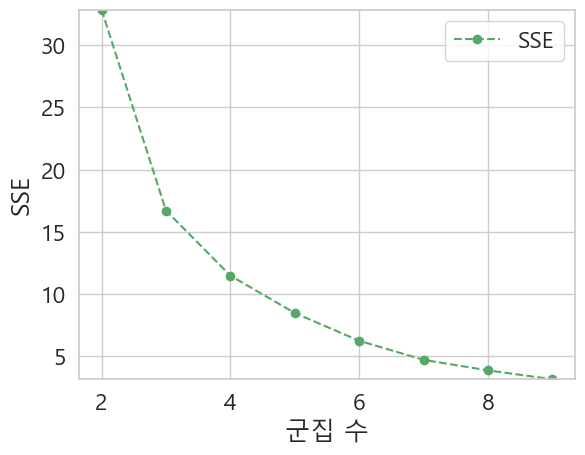

In [1355]:
fig, ax = plt.subplots()
line = ax.plot(np.arange(2,10), wss, 'go--', label='SSE')
ax.set_ylim(wss.min(), wss.max())
ax.set_xlabel('군집 수')
ax.set_ylabel('SSE')
labels = [l.get_label() for l in line]
plt.legend(line, labels)
plt.show()

# 최적의 군집 수 3 확인

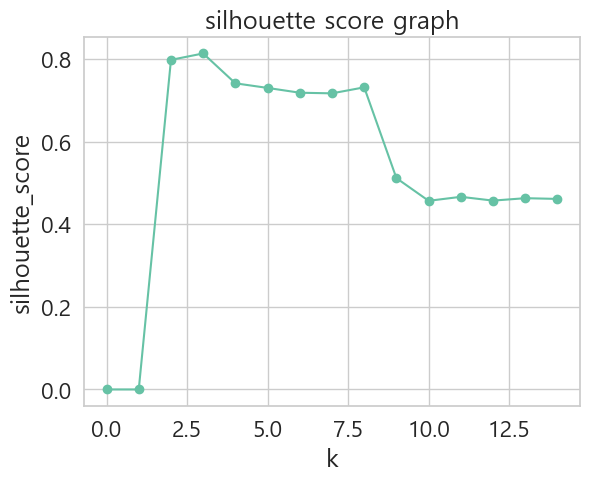

In [1356]:
## 실루엣 점수 계산 그래프 그리기
silhouette_score_collection = np.zeros(15)
for i in range(2,15) :
    silhouette_kmeans = KMeans(n_clusters= i, n_init=10)
    y_pred = silhouette_kmeans.fit_predict(cluster)
    silhouette_kmeans.labels_
    silhouette_score_collection[i] = silhouette_score(cluster, silhouette_kmeans.labels_)
silhouette_score_collection

silhouette_score_graph = pd.DataFrame(silhouette_score_collection)
plt.plot(silhouette_score_graph, marker = 'o')
plt.title("silhouette score graph")
plt.ylabel("silhouette_score")
plt.xlabel("k")
plt.savefig('silhouette_score.png')
plt.show()

In [1357]:
# K-means 클러스터링 수행
kmeans = KMeans(n_clusters=3, n_init=10).fit(cluster)

# 클러스터 할당 결과 출력
labels = kmeans.labels_
print(labels)

[0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 2 1 0 0 0 0 0 1 2 0 0
 0 0 0 0 0 0 2 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0
 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 2 0 0]


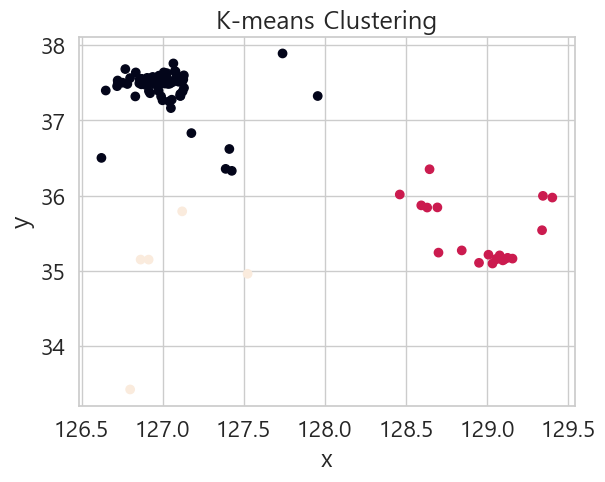

In [1358]:
plt.scatter(concat_data['x'], concat_data['y'], c=labels)
plt.xlabel('x')
plt.ylabel('y')
plt.title('K-means Clustering')
plt.show()

In [1359]:
concat_data['clust'] = labels

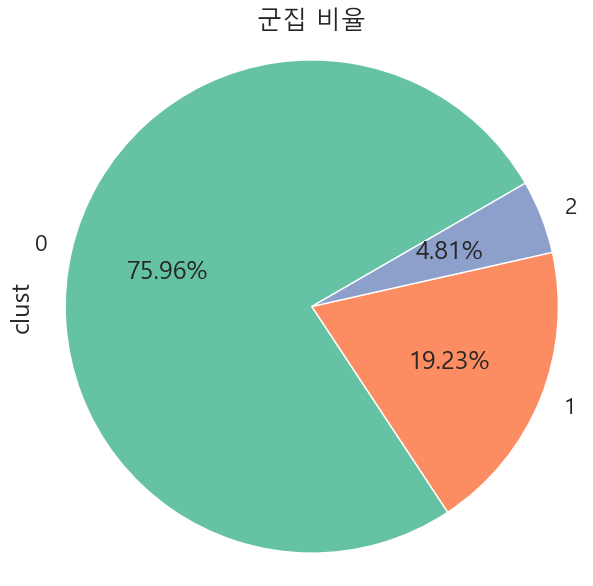

In [1360]:
plt.figure(figsize=(6,6))
concat_data.clust.value_counts().plot.pie(autopct='%.2f%%', figsize=(7,7),
                                startangle=30, legend=False)
plt.title('군집 비율')
plt.axis('equal')
plt.savefig('군집 비율')
plt.show()

In [1361]:
concat_data.drop(columns=['x', 'y'], inplace=True)
concat_data.insert(9, 'cluster', concat_data['clust'])
concat_data.drop(columns=['clust'], inplace=True)

In [1362]:
year = concat_data['OpeningDate'].dt.year
month = concat_data['OpeningDate'].dt.month

concat_data.insert(7, 'year', year)
concat_data.insert(8, 'month', month)
concat_data.drop(columns=['OpeningDate'], inplace=True)

In [1363]:
change_col = list(concat_data.columns[11:])

for i in range(len(concat_data)):
    i_year = concat_data.iloc[i]['year']
    i_month = concat_data.iloc[i]['month']
    
    div_12 = [col for col in change_col if str(i_year) not in col]  # 해당 연도 제외
    for col in div_12:
        concat_data.at[i, col] = int(concat_data.at[i, col] / 12)
        
    div_month = [col for col in change_col if str(i_year) in col]
    for col in div_month:
        concat_data.at[i, col] = int(concat_data.at[i, col] / (13 - i_month))


# Analyze

In [1364]:
org_data = concat_data.iloc[:,:11]
target_data = concat_data.iloc[:,-1]
analyze_data = pd.concat([org_data, target_data], axis=1)
analyze_data = analyze_data.set_index('국문')

In [1365]:
import statsmodels.api as sm

# 종속 변수 및 설명 변수 선택
dependent_variable = 'EBITDA_2009'
independent_variables = analyze_data.columns[analyze_data.columns != dependent_variable]

# 독립변수 행렬 및 종속변수 배열 생성
X = analyze_data[independent_variables]
y = analyze_data[dependent_variable]

# 상수항 추가
X = sm.add_constant(X)

# 다중 회귀 모델 적합
model = sm.OLS(y, X).fit()

# 회귀분석 결과 출력
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            EBITDA_2009   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     17.83
Date:                Fri, 23 Feb 2024   Prob (F-statistic):           1.12e-17
Time:                        23:20:23   Log-Likelihood:                -1851.5
No. Observations:                 104   AIC:                             3725.
Df Residuals:                      93   BIC:                             3754.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9.824e+08   1.34e+09     -0.732      0.4

In [1366]:
pvalue_col = ['No.Table', 'No.Seat', 'No.Staffs']
final_clust_data = analyze_data[pvalue_col]

In [1367]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# 각 열을 0에서 1로 스케일링
final_clust_data_scale = pd.DataFrame(scaler.fit_transform(final_clust_data), columns=final_clust_data.columns)

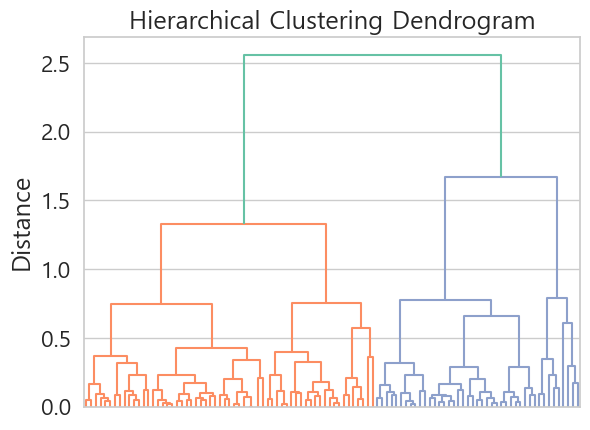

In [1368]:
from scipy.cluster.hierarchy import linkage, dendrogram

# 계층적 군집화를 위한 linkage matrix 생성
linkage_matrix = linkage(final_clust_data_scale, method='ward')

# 시각화를 위한 덴드로그램 생성
dendrogram(linkage_matrix, leaf_rotation=90, leaf_font_size=0, show_leaf_counts=False, no_labels=True)

# 플롯 설정
plt.title('Hierarchical Clustering Dendrogram')
# plt.xlabel('Data Points')
plt.ylabel('Distance')


# 덴드로그램 출력
plt.show()

In [1369]:
from scipy.cluster.hierarchy import fcluster

# 덴드로그램으로부터 군집 개수를 결정
num_clusters = 4

# 덴드로그램으로부터 각 데이터 포인트의 군집 할당
hierarchy_cluster_labels = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

# 군집 할당 결과를 데이터프레임에 추가
final_clust_data_scale['Cluster'] = hierarchy_cluster_labels

# prediction

In [1370]:
TotalSales_col = [i for i in concat_data.columns if 'Total' in i]
final = concat_data[TotalSales_col]
final = final.copy()

In [1371]:
final['2005_2006_Change'] = final['2006_TotalSales'] - final['2005_TotalSales']
final['2006_2007_Change'] = final['2007_TotalSales'] - final['2006_TotalSales']
final['2007_2008_Change'] = final['2008_TotalSales'] - final['2007_TotalSales']
final['2008_2009_Change'] = final['2009_TotalSales'] - final['2008_TotalSales']

In [1372]:
final.loc[final['2005_TotalSales'] == 0, '2005_2006_Change'] = 0
final.loc[final['2006_TotalSales'] == 0, '2006_2007_Change'] = 0
final.loc[final['2007_TotalSales'] == 0, '2007_2008_Change'] = 0
final.loc[final['2008_TotalSales'] == 0, '2008_2009_Change'] = 0

In [1373]:
result = final.iloc[:,5:]
# result['price'] = final['2009_TotalSales']
result['cluster'] = final_clust_data_scale['Cluster']

In [1374]:
dic = {}
for i in result['cluster'].unique():
    cluster_value = result[result['cluster'] == i].mean().mean()
    dic[i] = cluster_value
dic

{1: -9963733.4,
 3: -7671434.511764705,
 2: -10062076.686956521,
 4: -10914772.533333331}

In [1375]:
last = pd.concat([final['2009_TotalSales'], result['cluster']], axis=1)

In [1376]:
change = []
for i in last['cluster']:
    change.append(dic[i])
last['change'] = change
last.drop(columns='cluster', inplace=True)

In [1377]:
last['2009'] = last['2009_TotalSales'] * 12
last.drop(columns=['2009_TotalSales'], inplace=True)

In [1391]:
answer = int((last['2009'] - last['change'] * 11).sum())
formatted_answer = format(answer, ',')
print(f"2020년 매출액 : {formatted_answer}")

2020년 매출액 : 267,387,060,807
